In [64]:
# # Import modules and set options
from bokeh.layouts import grid, layout
from bokeh.models import ColumnDataSource, CategoricalColorMapper, annotations, Div
from bokeh.models.widgets import DataTable, TableColumn, HTMLTemplateFormatter
from bokeh.plotting import figure, output_notebook, show, output_file, save
from bokeh.palettes import all_palettes
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import atomsci.ddm.utils.rdkit_easy as rdk
import pickle
from rdkit.Chem import AllChem

In [65]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# import HTML
%config Completer.use_jedi=False
rdk.setup_notebook()

Loading BokehJS ...

In [66]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
# from sklearn 0.19.2 documentation:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [67]:
perf_path = '../RF_models/RF_results/'
with open(perf_path+'nek2_inhib_UNDER_results.pkl', 'rb') as f: 
    under_results = pickle.load(f)


/Users/jayceepang/msse/capstone/atomsci/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/msse/capstone/atomsci/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/msse/capstone/atomsci/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estima

In [68]:
perf_results = under_results[2]
train_perf = perf_results['train_results']
test_perf = perf_results['test_results']
train_perf

predictions  accuracy  precision    recall  specificity  y  prob_class0  \
0              1  0.878924   0.810219  0.991071     0.765766  0     0.000000   
1              1  0.878924   0.810219  0.991071     0.765766  0     0.405000   
2              0  0.878924   0.810219  0.991071     0.765766  0     1.000000   
3              0  0.878924   0.810219  0.991071     0.765766  0     1.000000   
4              0  0.878924   0.810219  0.991071     0.765766  0     1.000000   
..           ...       ...        ...       ...          ... ..          ...   
218            1  0.878924   0.810219  0.991071     0.765766  1     0.000000   
219            1  0.878924   0.810219  0.991071     0.765766  1     0.000000   
220            1  0.878924   0.810219  0.991071     0.765766  1     0.000000   
221            1  0.878924   0.810219  0.991071     0.765766  1     0.000000   
222            1  0.878924   0.810219  0.991071     0.765766  1     0.226667   

     prob_class1  
0       1.000000  
1       0.595000  
2       0.000000  
3       0.000000  
4       0.000000  
..           ...  
218     1.000000  
219     1.000000  
220     1.000000  
221     1.000000  
222     0.773333  

[223 rows x 8 columns]

In [69]:
df_UNDER = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK2/inhib/NEK2_inhibition_moe_UNDER_df.csv')
df_UNDER


subset compound_id                                  base_rdkit_smiles  \
0    train     kdb_952                      O=C1NCCc2[nH]c(-c3ccncc3)cc21   
1    train    kdb_1416    CC(C)Cc1nc(Nc2ccc(N3CCOCC3)c(Cl)c2)nc2[nH]ccc12   
2    train    kdb_3103  O=C([O-])c1ccc(Oc2nccc(-c3c(-c4ccc(F)cc4)ncn3C...   
3    train     kdb_682              Clc1ccc2[nH]nc(-c3nc4ccncc4[nH]3)c2c1   
4    train    kdb_1633  COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncn3)cc2NCC...   
..     ...         ...                                                ...   
628   test    kdb_3749  COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c(n1)n...   
629   test    kdb_1424  Nc1ncc(-c2cnn(CCO)c2)c2scc(-c3ccc(NC(=O)Nc4ccc...   
630   test    kdb_1471        NC(=O)c1ccc2nc(-c3ccc([N+](=O)[O-])o3)cn2c1   
631   test    kdb_3763  CN1C(=O)C2Cc3ccccc3N2c2nc(Nc3ccc(N4CCOCC4)cc3)...   
632   test    kdb_3767  COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N1c3ccccc3C...   

      fold  ASA+_per_atom      ASA-  ASA_H_per_atom     ASA_P  ASA_per_atom  \
0    fold4       0.683023 -0.956409       -0.145921 -0.189920     -0.289861   
1    fold2      -0.272498  0.264072       -0.351827 -0.028637     -1.045693   
2    fold4       0.082007 -0.453737       -0.387722  0.069547     -0.453039   
3    fold4      -0.166975 -0.804677       -2.184556  1.586080      0.039153   
4    fold2       0.034226 -1.212531       -0.086025 -1.221520     -1.049549   
..     ...            ...       ...             ...       ...           ...   
628  fold1      -0.623028 -1.557764       -1.193744 -0.432931     -2.091633   
629  fold1      -0.125470  1.922612       -0.419001  1.946550      0.156756   
630  fold1      -0.594013  0.649893       -1.141236  1.517193      1.898854   
631  fold1      -0.596354 -0.784268       -0.394562 -1.048067     -1.320337   
632  fold1       1.129970 -1.594277       -0.201603 -0.422848     -0.985181   

     BCUT_PEOE_0  BCUT_PEOE_1  BCUT_PEOE_2  BCUT_PEOE_3  \
0      -1.159336     0.446084     0.033404     0.979514   
1      -1.020205     1.283524    -0.597779     0.800755   
2      -1.243817     1.421393     0.090124     1.179137   
3       1.161200     1.279548     0.733269    -0.689923   
4      -0.290073    -0.406352     0.803001     0.492284   
..           ...          ...          ...          ...   
628    -1.603090     1.520237    -0.190146     1.645551   
629     0.575377    -0.570141     0.781018    -0.670653   
630     1.339963    -1.067651     1.045242    -1.125939   
631    -0.656339     0.056784     0.167079     0.512249   
632    -1.160405     1.432629    -0.523872     0.980235   

     BCUT_SLOGP_0_per_atom  BCUT_SLOGP_1  BCUT_SLOGP_2  BCUT_SLOGP_3  \
0                -1.113448     -1.094508     -0.134550     -0.492768   
1                 0.843362      0.231114     -0.799051     -0.170232   
2                -0.694926     -1.077238     -0.480196      0.118011   
3                -0.595470      1.239728      0.003016     -0.563081   
4                -0.313053     -0.069439      0.188664     -0.579352   
..                     ...           ...           ...           ...   
628               1.057255     -0.738072     -0.713098      0.960792   
629               1.458748     -0.069439      0.560514     -0.432788   
630              -1.979357     -1.358413     -0.218856     -1.235277   
631               0.804407      0.556019     -0.005496      0.493375   
632               0.494803      0.116480     -0.867349      0.494828   

     BCUT_SMR_0_per_atom  BCUT_SMR_1  BCUT_SMR_2  BCUT_SMR_3_per_atom  \
0              -0.486578   -0.353097   -1.220755             0.084300   
1               1.235465    0.214402   -1.404859            -1.278837   
2              -0.228845   -0.345577   -0.902951            -0.102857   
3              -0.642514    0.307974   -0.816244             0.717076   
4               0.225506   -1.090715    0.339944            -0.455311   
..                   ...         ...         ...                  ...   
628             1.395862    0.031618   -1.316

In [71]:
# df_UNDER = pd.read_csv('../features/nek2_moe_inhib_UNDER_matched.csv')

# idx_UNDER = df_UNDER.iloc[:,0]
# df_UNDER = df_UNDER.iloc[:, 1:]
# df_train = pd.concat([df_UNDER[df_UNDER['subset']=='train'], train_perf], axis=1)
df_train = pd.concat([df_UNDER[df_UNDER['subset']=='train'].reset_index(drop=True),train_perf.reset_index(drop=True)],axis=1)
df_train
# df_test = pd.concat([df_UNDER[df_UNDER['subset']=='test'], test_perf])
# df_test
df_test = pd.concat([df_UNDER[df_UNDER['subset']=='test'].reset_index(drop=True),test_perf.reset_index(drop=True)],axis=1)
df_test
df = pd.concat([df_train, df_test])

In [72]:
train_subset = df_train[df_train['subset']=='train']
train_subset
y_train_true = train_subset['active']

y_pred_train = train_subset['predictions']
y_pred_train.dropna
y_pred_train[223] = 1.0
y_pred_train
train_subset

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_46752/1044467630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_train[223] = 1.0


subset compound_id                                  base_rdkit_smiles  \
0    train     kdb_952                      O=C1NCCc2[nH]c(-c3ccncc3)cc21   
1    train    kdb_1416    CC(C)Cc1nc(Nc2ccc(N3CCOCC3)c(Cl)c2)nc2[nH]ccc12   
2    train    kdb_3103  O=C([O-])c1ccc(Oc2nccc(-c3c(-c4ccc(F)cc4)ncn3C...   
3    train     kdb_682              Clc1ccc2[nH]nc(-c3nc4ccncc4[nH]3)c2c1   
4    train    kdb_1633  COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncn3)cc2NCC...   
..     ...         ...                                                ...   
219  train    kdb_1482             O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ncccc2N1   
220  train    kdb_3637  CN1N=C(N)c2cn([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3...   
221  train     kdb_752  Cc1cc(N2CCOCC2)cc2[nH]c(-c3c(NCC(O)c4cccc(Cl)c...   
222  train    kdb_3262  CNC(=O)c1ncccc1Nc1nc(Nc2cc3c(cc2OC)CCCN3C(=O)C...   
223  train    kdb_1531  CCCn1c(C2CCNCC2)nc(-c2ccc(Cl)c(Cl)c2)c1-c1ccnc...   

      fold  ASA+_per_atom      ASA-  ASA_H_per_atom     ASA_P  ASA_per_atom  \
0    fold4       0.683023 -0.956409       -0.145921 -0.189920     -0.289861   
1    fold2      -0.272498  0.264072       -0.351827 -0.028637     -1.045693   
2    fold4       0.082007 -0.453737       -0.387722  0.069547     -0.453039   
3    fold4      -0.166975 -0.804677       -2.184556  1.586080      0.039153   
4    fold2       0.034226 -1.212531       -0.086025 -1.221520     -1.049549   
..     ...            ...       ...             ...       ...           ...   
219  fold4       0.312990 -1.433417       -1.358814  0.704338     -1.052976   
220  fold5      -1.347623  0.554759       -0.745052 -0.295809     -1.468070   
221  fold5      -0.884499 -0.472623       -1.181466  0.290662     -0.797097   
222  fold4      -0.681789  0.883575       -0.703685  0.737981     -0.903206   
223  fold4      -0.134253  1.058461       -1.192353  2.347570      0.029710   

     BCUT_PEOE_0  BCUT_PEOE_1  BCUT_PEOE_2  BCUT_PEOE_3  \
0      -1.159336     0.446084     0.033404     0.979514   
1      -1.020205     1.283524    -0.597779     0.800755   
2      -1.243817     1.421393     0.090124     1.179137   
3       1.161200     1.279548     0.733269    -0.689923   
4      -0.290073    -0.406352     0.803001     0.492284   
..           ...          ...          ...          ...   
219     0.981839    -0.627980     0.740824    -0.645502   
220    -0.948213    -1.175212     0.160747     0.808038   
221     0.879297    -0.282569     0.497221    -1.319114   
222    -1.354133     1.060782    -0.636977     1.296474   
223     0.285700     0.513604    -0.322042    -0.317981   

     BCUT_SLOGP_0_per_atom  BCUT_SLOGP_1  BCUT_SLOGP_2  BCUT_SLOGP_3  \
0                -1.113448     -1.094508     -0.134550     -0.492768   
1                 0.843362      0.231114     -0.799051     -0.170232   
2                -0.694926     -1.077238     -0.480196      0.118011   
3                -0.595470      1.239728      0.003016     -0.563081   
4                -0.313053     -0.069439      0.188664     -0.579352   
..                     ...           ...           ...           ...   
219               0.194464     -0.069439     -0.058077     -0.781467   
220               0.747210     -0.338390      0.264441     -0.303063   
221               0.444453      0.277257      0.634096     -0.752913   
222               0.570707      1.084438     -0.480593      1.216109   
223               0.940415      0.282940      0.072636     -0.351294   

     BCUT_SMR_0_per_atom  BCUT_SMR_1  BCUT_SMR_2  BCUT_SMR_3_per_atom  \
0              -0.486578   -0.353097   -1.220755             0.084300   
1               1.235465    0.214402   -1.404859            -1.278837   
2              -0.228845   -0.345577   -0.902951            -0.102857   
3              -0.642514    0.307974   -0.816244             0.717076   
4               0.225506   -1.090715    0.339944            -0.455311   
..                   ...         ...         ...                  ...   
219             1.010323   -1.090715    0.368

Confusion matrix, without normalization
[[ 86  26]
 [  0 112]]


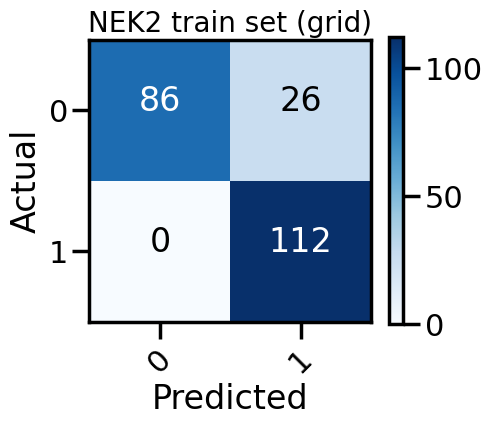

In [73]:
sns.set_context('poster')
# Create the confusion matrix
train=df_train[df_train['predictions']=='train']
train_best_cm = confusion_matrix(y_train_true, y_pred_train)
class_names = ["0","1"]

ax = plt.figure(figsize=(5,5))
plt.title("NEK2 train set (grid)",fontsize=20)
plot_confusion_matrix(train_best_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.savefig('train_inhib_cm.png') # save

In [74]:
test_subset = df_test[df_test['subset']=='test']

y_test_true = test_subset['active']
y_pred_test = test_subset['predictions']
# y_pred_test[282]=1.0
y_pred_test[408]=1.0

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_46752/2882759643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_test[408]=1.0


Confusion matrix, without normalization
[[309  72]
 [  7  21]]


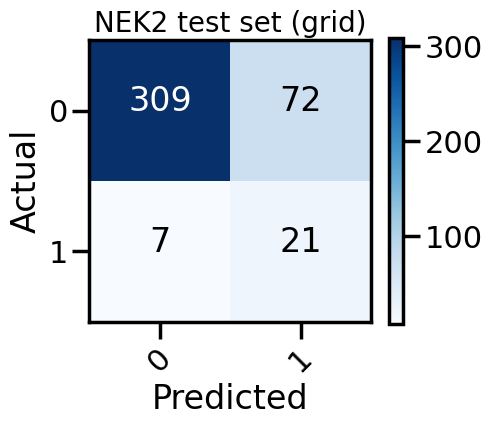

In [75]:
test_best_cm = confusion_matrix(y_test_true, y_pred_test)
class_names = ["0","1"]

ax = plt.figure(figsize=(5,5))
plt.title("NEK2 test set (grid)",fontsize=20)
plot_confusion_matrix(test_best_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted");
plt.ylabel("Actual");
plt.savefig('test_inhib_cm.png') # save

In [76]:
# create HTML encoded images for file
import base64

data_uri = base64.b64encode(open('train_inhib_cm.png', 'rb').read()).decode('utf-8')
train_cm_html_string = '<img src="data:image/png;base64,{0}" alt="Distribution of measured values" width="360" height="360">'.format(data_uri)

data_uri = base64.b64encode(open('test_inhib_cm.png', 'rb').read()).decode('utf-8')
test_cm_html_string = '<img src="data:image/png;base64,{0}" alt="Distribution of measured values" width="360" height="360">'.format(data_uri)


In [77]:
df = df.dropna(subset=['base_rdkit_smiles'])
df = df[df['base_rdkit_smiles'].apply(lambda x: isinstance(x, str))]

Failed to patch pandas - unable to change molecule rendering


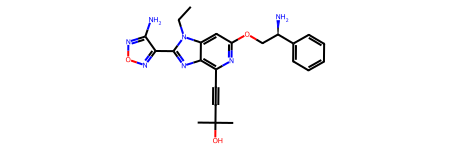

In [78]:
df=rdk.add_mol_column(df, 'base_rdkit_smiles', molecule_col='mol', )
df.mol.iloc[35]

In [79]:
df['mol_html']=df.mol.apply(rdk.mol_to_html, embed=True, width=350, height=150)

In [80]:
%%time

# Calculate RDKit descriptors
df=rdk.calculate_descriptors(df, molecule_column='mol')
rdk.show_df(df.head(2))

# Cluster molecules by Morgan fingerprint
rdk.cluster_dataframe(df, molecule_column='mol', cluster_column='butina_cluster', cutoff=0.4)

CPU times: user 7.62 s, sys: 2.41 s, total: 10 s
Wall time: 7.29 s


In [81]:
df=df.copy()

In [82]:
df['class']=df['subset']+'_'+df['active'].astype(str)

In [83]:
# initial graph axes values
df['x']=df.butina_cluster
df['y']=df.MolWt

In [84]:
df['All_Data']=True
df['FP']= (df.active==0)&(df.predictions==1)
df['TP']= (df.active==1)&(df.predictions==1)
df['FN']= (df.active==1)&(df.predictions==0)
df['TN']= (df.active==0)&(df.predictions==0)

In [85]:
# round columns for bokeh table
for col in ['MaxEStateIndex', 'MinEStateIndex','MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt','HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons','NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge','MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1','FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW','BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW','BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n','Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v','Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3','LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12','PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4','PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9','SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5','SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1','SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3','SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8','SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11','EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5','EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9','VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3','VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7','VSA_EState8', 'VSA_EState9', 'FractionCSP3', 'HeavyAtomCount','NHOHCount', 'NOCount', 'NumAliphaticCarbocycles','NumAliphaticHeterocycles', 'NumAliphaticRings','NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings','NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds','NumSaturatedCarbocycles', 'NumSaturatedHeterocycles','NumSaturatedRings', 'RingCount', 'MolLogP', 'MolMR', 'fr_Al_COO','fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N','fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO','fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2','fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole','fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide','fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline','fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene','fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine','fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido','fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide','fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss','fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile','fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso','fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol','fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester','fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd','fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone','fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan','fr_thiophene', 'fr_unbrch_alkane', 'fr_urea']:
    try:
        df[col]=df[col].round(5)
    except:
        continue

# Columns for table and graph

In [87]:
# select columns for bokeh table and graph
# removing fold 
bokehcols=['butina_cluster','compound_id', 'active', 'predictions', 'prob_class0', 'prob_class1','subset','class','base_rdkit_smiles', 'mol_html','x','y','MolWt','NumHDonors','NumHAcceptors','MolLogP','HeavyAtomCount','NumRotatableBonds','TPSA','FractionCSP3','All_Data','FP','TP','FN','TN',
          'ASA_H_per_atom','ASA-', 'ASA_H_per_atom', 'BCUT_PEOE_0', 'BCUT_SLOGP_0_per_atom', 'CASA+_per_atom','DASA_per_atom', 'FASA+',  'FCharge','GCUT_PEOE_1', 'Kier1_per_atom', 'KierFlex_per_atom'
          , 'PEOE_VSA14','PC-_per_atom', 'a_acid', 'weinerPath' ]
tablecols=['butina_cluster','compound_id', 'mol_html','class', 'active','predictions', 'prob_class0', 'prob_class1','subset', 'base_rdkit_smiles', 'MolWt','NumHDonors','NumHAcceptors','MolLogP','HeavyAtomCount','NumRotatableBonds','TPSA','FractionCSP3']
xycols  = ['butina_cluster','active','predictions', 'prob_class0', 'prob_class1','MolWt','NumHDonors','NumHAcceptors','MolLogP','HeavyAtomCount','NumRotatableBonds','TPSA','FractionCSP3','ASA_H_per_atom',
              'ASA-', 'ASA_H_per_atom', 'BCUT_PEOE_0', 'BCUT_SLOGP_0_per_atom', 'CASA+_per_atom','DASA_per_atom', 'FASA+',  'FCharge','GCUT_PEOE_1', 'Kier1_per_atom', 'KierFlex_per_atom'
          , 'PEOE_VSA14','PC-_per_atom', 'a_acid', 'weinerPath' ]
subsets = ['All_Data','FP','TP','FN','TN']

In [88]:
# round more cols
for col in xycols:
    try:
        df[col]=df[col].round(5)
    except:
        pass

In [90]:
# create bokehdf
bokehdf=df[bokehcols]

In [91]:
# sort bokeh df
# from pandas.api.types import CategoricalDtype
# typecat=CategoricalDtype(['oldMod_oldData', 'newMod_oldData', 'newMod_newData'], ordered=True)
# bokehdf['expt']=bokehdf['expt'].astype(typecat)
bokehdf=bokehdf.sort_values(['butina_cluster','MolWt']).reset_index(drop=True)
bokehdf.columns

Index(['butina_cluster', 'compound_id', 'active', 'predictions', 'prob_class0',
       'prob_class1', 'subset', 'class', 'base_rdkit_smiles', 'mol_html', 'x',
       'y', 'MolWt', 'NumHDonors', 'NumHAcceptors', 'MolLogP',
       'HeavyAtomCount', 'NumRotatableBonds', 'TPSA', 'FractionCSP3',
       'All_Data', 'FP', 'TP', 'FN', 'TN', 'ASA_H_per_atom', 'ASA-',
       'ASA_H_per_atom', 'BCUT_PEOE_0', 'BCUT_SLOGP_0_per_atom',
       'CASA+_per_atom', 'DASA_per_atom', 'FASA+', 'FCharge', 'GCUT_PEOE_1',
       'Kier1_per_atom', 'KierFlex_per_atom', 'PEOE_VSA14', 'PC-_per_atom',
       'a_acid', 'weinerPath'],
      dtype='object')

In [92]:
# # Import modules and set options
from bokeh.layouts import grid, row, column
from bokeh.models import ColumnDataSource, CategoricalColorMapper, annotations, LinearColorMapper, HoverTool, BooleanFilter, CDSView, Select, CustomJS, LinearAxis, Legend, LegendItem
from bokeh.models.widgets import DataTable, TableColumn, HTMLTemplateFormatter
from bokeh.plotting import figure, output_notebook, show, output_file, save
from bokeh.transform import linear_cmap
from bokeh.models import ColorBar

from bokeh.embed import components

colors = ["#6EC8BE","#BE2369","#FFC30F","#694691","#EB1E23","#7682A4","#373C50","#A7DDD8",]

from bokeh.models import ColumnDataSource, CustomJS
from bokeh.models.widgets import Button
from bokeh.io import show
import os

In [93]:
# Bokeh

output_file(filename="explore_NEK2_moe_inhib_UNDER_mols.html", title="Explore NEK2 molecules")

y = 'y'
x = 'x'
color = 'class'

hover = HoverTool(line_policy='interp', point_policy='follow_mouse', attachment='right')

hover.tooltips = """
    <div>
        <div>
            @mol_html{safe}<br>
        </div>
        <div>
            <span style="font-size: 15px; font-weight: bold;">Compound: @compound_id</span><br>
            <span style="font-size: 15px; font-weight: bold;">Cluster: @butina_cluster</span><br>
            <span style="font-size: 15px;">Active: @active</span><br>
        </div>
    </div>
"""

# Shared source of all data
source = ColumnDataSource(bokehdf)

# subsetted data for plotting
source_plot=ColumnDataSource(bokehdf)

# selected table data
source2=ColumnDataSource(bokehdf[tablecols])

# create figure & colors
fig = figure(title="NEK2 Binding Classification Dataset",  height=500, width=1500, 
             # sizing_mode="stretch_width",
             tools='box_select,lasso_select,tap,pan,wheel_zoom,box_zoom,save,reset,help', active_drag="box_zoom")
fig.add_tools(hover)

# # for many colors
# colormapper = LinearColorMapper(palette='Turbo256', low=bokehdf[color].min(), high=bokehdf[color].max())

# for a few colors
colormapper = CategoricalColorMapper(palette=colors[0:len(bokehdf[color].unique().tolist())],  factors = bokehdf[color].unique().tolist())

fig.scatter(x=x, y=y, source=source_plot, color={'field':color, 'transform':colormapper}, muted_alpha=0.2,legend_field=color)
fig.legend.visible=True
fig.xaxis.axis_label='butina_cluster'
fig.yaxis.axis_label='MolWt'
fig.add_layout(fig.legend[0], 'right')

# create Select menus for x and y axes
selx=Select(title='X axis:', value='butina_cluster', options=xycols, width=300)
sely=Select(title='Y axis:', value='MolWt', options=xycols, width=300)
selsubs=Select(title='Filter subset', value='All', options=subsets, width=300)
               
# define a callback function to update the plot when the Select widget values change
# I Cannot get this to work if I try to update both axes in the same callback. 
# Only referring to cb_obj.value works, for some reason if you pass the 
# Select object as an arg, accessing that object or value does not work.

callbackx = CustomJS(args=dict(source_plot=source_plot, xaxis=fig.xaxis[0]),
                    code="""
                        source_plot.data['x'] = source_plot.data[cb_obj.value];
                        source_plot.change.emit();
                        xaxis.axis_label=cb_obj.value;
                    """)

callbacky = CustomJS(args=dict(source_plot=source_plot, yaxis=fig.yaxis[0]),
                    code="""
                        source_plot.data['y'] = source_plot.data[cb_obj.value];
                        source_plot.change.emit();
                        yaxis.axis_label=cb_obj.value;
                    """)

callbacksubs = CustomJS(args=dict(source=source, source_plot=source_plot, source2=source2, bokehcols=bokehcols, 
                                  yaxis=fig.yaxis[0], xaxis=fig.xaxis[0]
                                 ),
                        code="""
                        var subset = cb_obj.value;
                        var d1 = source.data;
                        var d2 = source_plot.data;
                        var d3 = source2.data;
                        const cols = bokehcols;
                        var d2i=d2['index'];
                        var d3i=d3['index'];

                        //clear source_plot.data
                        for (let i=0; i<cols.length; i++) {
                            d2[cols[i]]=[];
                            d3[cols[i]]=[];
                            }
                        d2i=[];
                        d3i=[];
                        
                        console.log(subset);
                        for (var i = 0; i < d1[subset].length; i++) {
                        if (d1[subset][i]==1){
                            d2i.push(i);
                            d3i.push(i);
                            for (let j=0; j<cols.length; j++) {
                                    d2[cols[j]].push(d1[cols[j]][i]);
                                    d3[cols[j]].push(d1[cols[j]][i]);
                                }
                            }
                        }

                        d2['index']=d2i;
                        d3['index']=d3i;
                        source_plot.data=d2;
                        source2.data=d3;
                        xaxis.axis_label='butina_cluster';
                        yaxis.axis_label='MolWt';
                        console.log('Plot data');
                        console.log(source_plot.data);
                        source_plot.change.emit();
                        source2.change.emit();
                        """
                       )
                                  
# add the callback function to the Select widgets
selsubs.js_on_change('value', callbacksubs)
selx.js_on_change('value', callbackx)
sely.js_on_change('value', callbacky)


# For HTML in DataTable
html_template = HTMLTemplateFormatter(template='<%= value %>')

columns = []
for col in tablecols:
    width=80
    if 'mol_' in col:
        tmp=TableColumn(field=col, title=col.replace('_html',''), formatter=html_template, width=350)
    elif col=='smiles':
        continue
    else:
        tmp=TableColumn(field=col, title=col, width=80)
    columns.append(tmp)

table = DataTable(source=source2, columns=columns, row_height=200, 
                  # sizing_mode='stretch_width', 
                  selectable='checkbox', 
                  height=1000, 
                  width=1500,
                  editable=True,
                  # autosize_mode='fit_columns'
                 )

# callbacktable=CustomJS(args=dict(table=table, source_plot=source_plot, source2=source2),
#                        code="""
#                        console.log("Source plot data was changed for table");
#                        console.log(source_plot.data);
#                        source2.data=source_plot.data;
#                        source2.change.emit();
#                        table.change.emit();
#                        """)

# source_plot.js_on_change('data',callbacktable)
    
source_plot.selected.js_on_change(
    "indices",
    CustomJS(
        args=dict(source_plot=source_plot, source2=source2, table=table, tablecols=tablecols),
        code="""
        console.log("Data was selected on graph, updating table.");
        var inds = cb_obj.indices;
        var d3 = source_plot.data;
        var d4 = source2.data;
        const cols = tablecols;

        for (let i=0; i<cols.length; i++) {
            d4[cols[i]]=[];
            }

        if (inds.length==0){
            d4['index']=d3['index'];
            for (var i = 0; i < d3['butina_cluster'].length; i++) {
                for (let j=0; j<cols.length; j++) {
                    d4[cols[j]].push(d3[cols[j]][i]);
                }
            }
        }
        else {
            d4['index']=inds
            for (var i = 0; i < inds.length; i++) {
                for (let j=0; j<cols.length; j++) {
                    d4[cols[j]].push(d3[cols[j]][inds[i]]);
                    }
                }
            }
        
        console.log(d3['butina_cluster'].length);
        console.log(inds);
        source2.data=d4;
        source2.change.emit();
        table.change.emit();
""",
    ),
)


button = Button(label="Download selected data", button_type="success")
button.js_on_click(
    CustomJS(
        args=dict(data_source=source2),
        code=open("./download.js").read(),
    )
)

# Show

selectors = row(selsubs,selx,sely,button)
static = row(Div(text="""<b>Notes</b>
              <ul>
                  <li>Clustering is by Butina algorithm</li>
                  <li>You can use the graph tools or checkboxes to select a subset of data <br> for downloading, or download all data</li>
                  <li>You can download an image of the current graph with the graph tools</li>
              </ul>
              """), Div(text=train_cm_html_string), Div(text=test_cm_html_string))
info = column(Div(text="<b>Explore NEK2 molecules</b>", styles={'font-size': '30px', 'font-weight': 'bold'}) ,
              static)
# datas = row(info, table)
g = column(info,
           Div(),
           selectors, 
           fig,
           table
          )

save(g)

'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/nek2/EDA/explore_NEK2_moe_inhib_UNDER_mols.html'